In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import simulations

In [5]:
from functools import partial

## Second version of our model (sum of exponents multiplied by velocity)

Current version of our model without wind is:
$$\ddot{x_{i}}=A_{i}\Big[1-\frac{\dot{x_{i}}}{V_{i}}-\frac{\dot{x_{i}}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]$$

### Situation 1: each drone starts with its' optimal velocity, drones are sorted according to their optimal velocities. Each drone has the same K=1 and A=0.5.

In [25]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([5,4,3,2,1])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [26]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,5,4,3,2,1]), derivative=d)

<IPython.core.display.Javascript object>


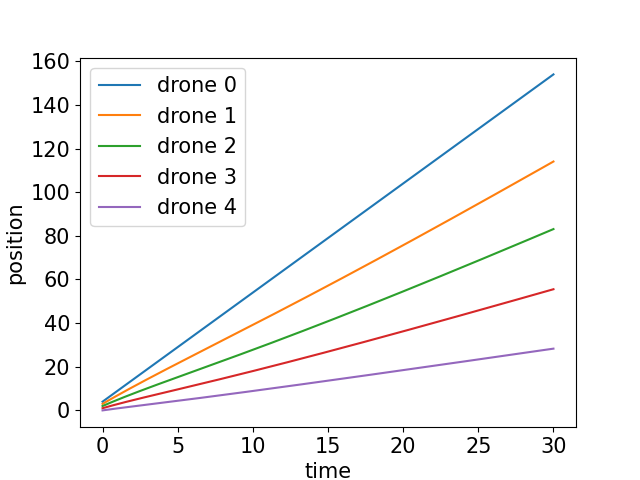

In [27]:
plt.plot(t,v[:,0],label='drone 0')
plt.plot(t,v[:,1],label='drone 1')
plt.plot(t,v[:,2],label='drone 2')
plt.plot(t,v[:,3],label='drone 3')
plt.plot(t,v[:,4],label='drone 4')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Situation 2: each drone starts with its' optimal velocity, but drones are not sorted according to their optimal velocities. Each drone has the same K=1 and A=0.5.

In [20]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [21]:
t, v = simulations.euler(initial_time=0, end_time=8, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


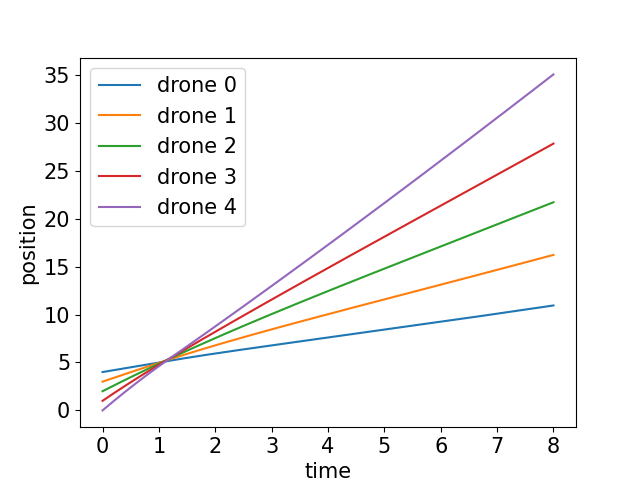

In [24]:
plt.plot(t,v[:,0],label='drone 0')
plt.plot(t,v[:,1],label='drone 1')
plt.plot(t,v[:,2],label='drone 2')
plt.plot(t,v[:,3],label='drone 3')
plt.plot(t,v[:,4],label='drone 4')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Situation 3: first drone has K>>kappa and is very slow.

In [77]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [78]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


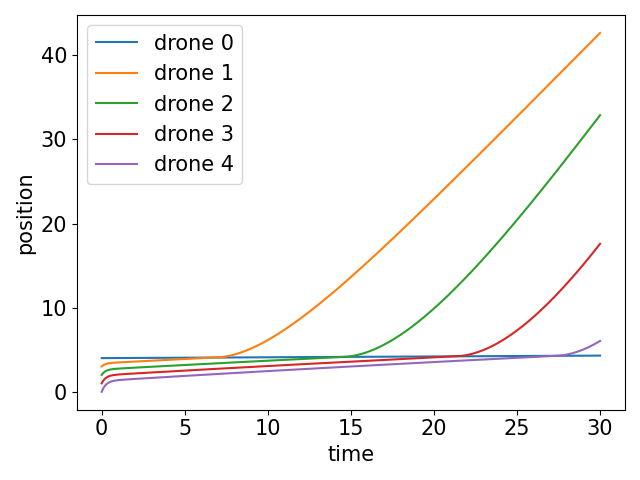

In [81]:
plt.plot(t,v[:,0],label='drone 0')
plt.plot(t,v[:,1],label='drone 1')
plt.plot(t,v[:,2],label='drone 2')
plt.plot(t,v[:,3],label='drone 3')
plt.plot(t,v[:,4],label='drone 4')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Situation 4: several drones have the same starting position and zero velocity, they are the same except for maximum acceleration.

In [32]:
A = np.array([10,5,1,0.5,0.1])
opt = np.array([30,30,30,30,30])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [33]:
t, v = simulations.euler(initial_time=0, end_time=60, number_of_points=1000000, initial_value=np.array([0,0,0,0,0,0,0,0,0,0]), derivative=d)

<IPython.core.display.Javascript object>


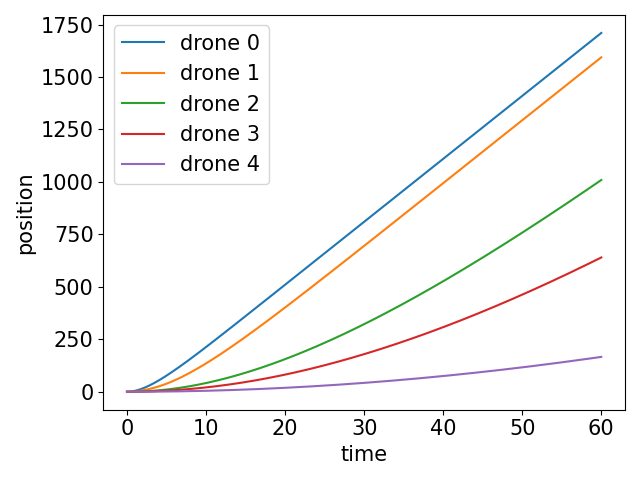

In [36]:
plt.plot(t,v[:,0],label='drone 0')
plt.plot(t,v[:,1],label='drone 1')
plt.plot(t,v[:,2],label='drone 2')
plt.plot(t,v[:,3],label='drone 3')
plt.plot(t,v[:,4],label='drone 4')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Situation 5: some complicated situation with lots of overtaking.

In [6]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

<IPython.core.display.Javascript object>


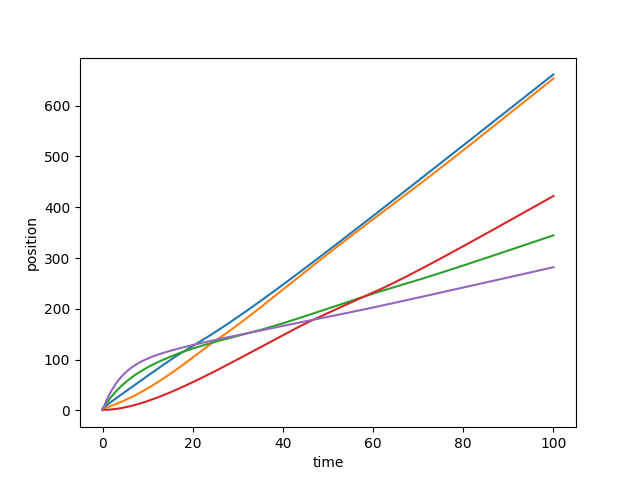

In [20]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

In [ ]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

### Situation 6: ,,stationary'' state

In [68]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,2,2,2])
kap = 10
K=np.array([50,50,50,50,50])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [69]:
t, v = simulations.euler(initial_time=0, end_time=200, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,2,2,2]), derivative=d)

<IPython.core.display.Javascript object>


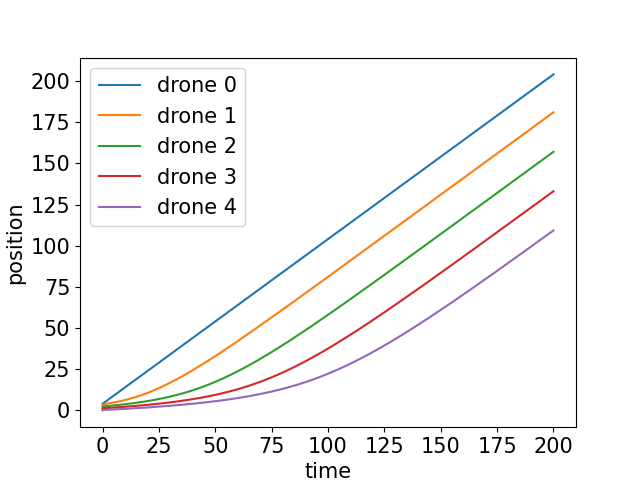

In [70]:
plt.plot(t,v[:,0],label='drone 0')
plt.plot(t,v[:,1],label='drone 1')
plt.plot(t,v[:,2],label='drone 2')
plt.plot(t,v[:,3],label='drone 3')
plt.plot(t,v[:,4],label='drone 4')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.legend(fontsize=15)
plt.show()

<IPython.core.display.Javascript object>


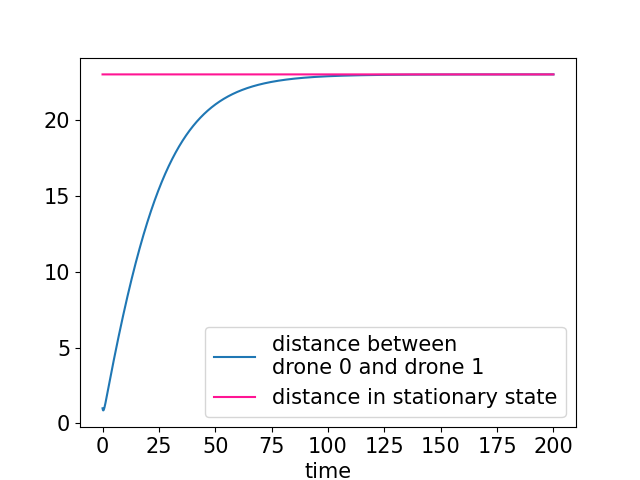

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [72]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0]-v[:,1], label='\n'.join(wrap('distance between drone 0 and drone 1',20)))
plt.plot(t,om*np.log((opt[0]/kap)*K[0]*np.exp((v[:,0]-v[:,0])/om)/(1-opt[0]/opt[1])), color='deeppink', label='distance in stationary state')
leg = ax.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [41]:
#import visualisations

<IPython.core.display.Javascript object>


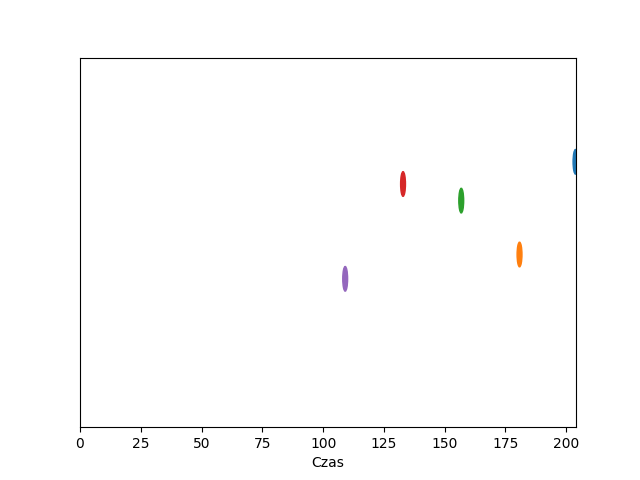

In [83]:
#visualisations.visualise(t,v)

### Situation 7: every static obstacle will be passed by a moving vehicle in finite time.

In [46]:
A = np.array([0.5,0])
opt = np.array([1,1e-10])
kap = 10
K=np.array([1,100])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [47]:
t, v = simulations.euler(initial_time=0, end_time=50, number_of_points=1000000, initial_value=np.array([0,5,1,0]), derivative=d)

<IPython.core.display.Javascript object>


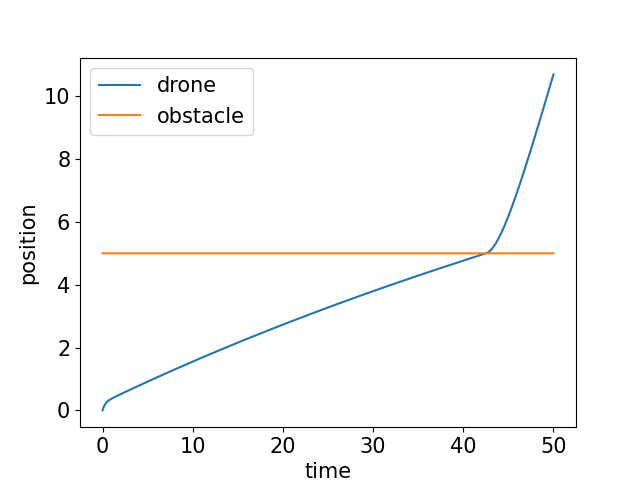

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [48]:
fig, ax = plt.subplots()
ax.plot(t,v[:,0], label='drone')
plt.plot(t, v[:,1], label='obstacle')
leg = ax.legend(fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ylabel('position',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [12]:
import visualisations

<IPython.core.display.Javascript object>


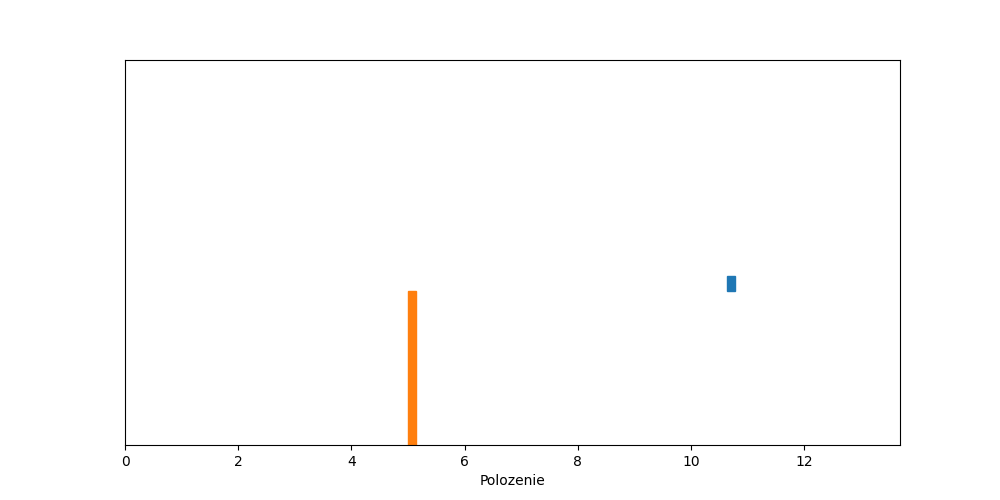

In [13]:
visualisations.visualise(t, v, filename='obstacle',drone_height=[2,0],drone_radius=[0.2,2],heightmax=5)

## Version with wind added

We simply add a component modelling wind-induced acceleration
$$\ddot{x_{i}}=A_{i}\Big[1-\frac{\dot{x_{i}}}{V_{i}}-\frac{\dot{x_{i}}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]+\frac{H_{i}}{m_{i}},$$
where $H_{i}$ is wind force for $i$-th drone. To compute this wind force we can use a formula:
$$H_{i}=\pm\frac{1}{2}\rho C_{d} A_{f}v^{2}_{wind}.$$

### Situation 1: each drone flies with its' optimal velocity, the fastest starts as the last one. In the first part of simulation (t<10) wind-induced acceleration equals -0.01, in the second part: -1.5.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [14]:
A = np.array([2,2,2,2,2])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
change_time=10
wind_force=[-0.01,-1.5]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=simulations.model3, wind_function=wrapped, m=m)

In [15]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


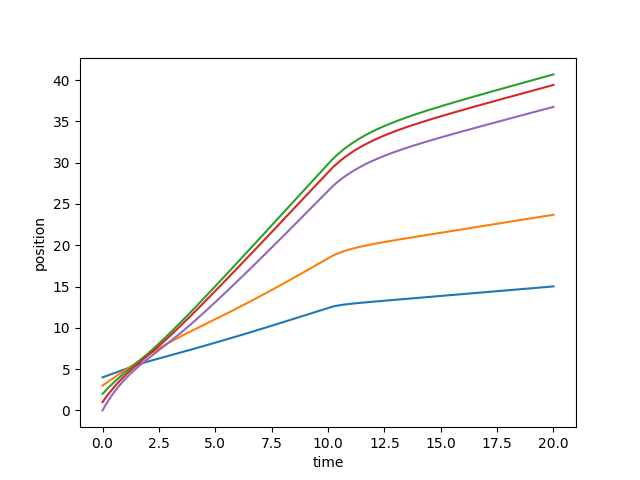

In [16]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 2: First drone has K>>kappa and is very slow. The others are faster and try to overtake. In the first part of simulation (t<5) wind-induced acceleration equals 1 and in the second part: -0.25.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [15]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
change_time=5
wind_force=[1,-0.25]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [16]:
t, v = simulations.euler(initial_time=0, end_time=35, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


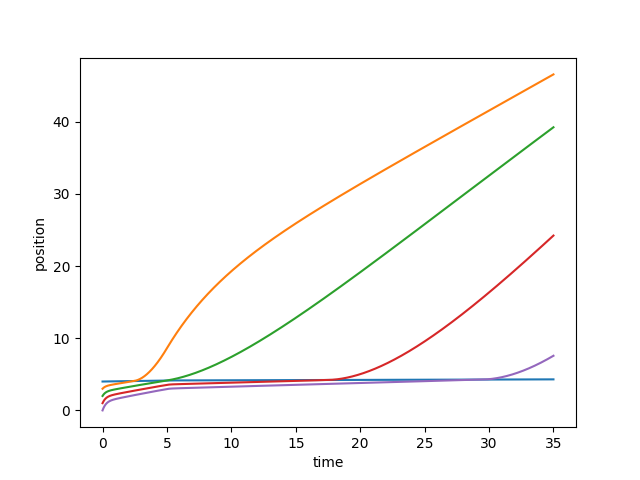

In [17]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 3: when wind blows, drones can be faster than their optimal velocity.

(Here we have a constant wind force, so the solution exists.)

In [82]:
A = np.array([0.5])
opt = np.array([3])
kap = 10
K=np.array([1])
om = 10
wind_force=5
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [83]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([10,3]), derivative=d)

In [84]:
from textwrap import wrap

<IPython.core.display.Javascript object>


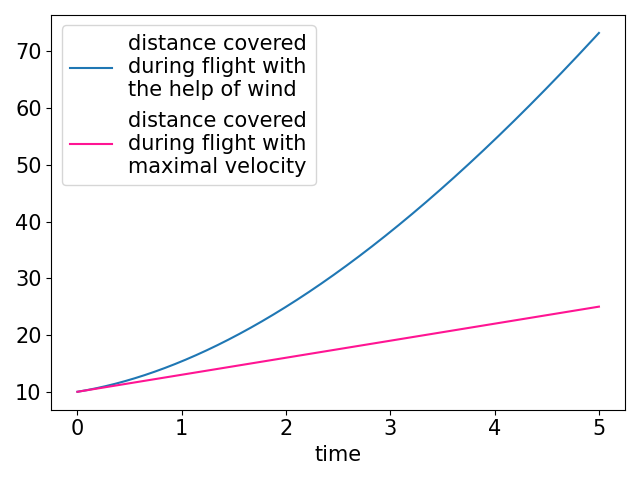

In [85]:
# plt.plot(t,v[:,0])
# plt.xlabel("time")
# plt.ylabel("position")
# plt.show()
fig, ax = plt.subplots()
ax.plot(t, v[:,0], label='\n'.join(wrap('distance covered during flight with the help of wind', 20)))
ax.plot(t, v[0,0]+opt[0]*t, color='deeppink', label='\n'.join(wrap('distance covered during flight with maximal velocity',20)))
leg = ax.legend(fontsize=15);
plt.xlabel('time',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

### Situation 4: when wind blows, drones can have negative velocity.

(Here we have a constant wind force, so the solution exists.)

In [7]:
A = np.array([0.5])
opt = np.array([4])
kap = 10
K=np.array([1])
om = 10
wind_force=-6
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([10,4]), derivative=d)

<IPython.core.display.Javascript object>


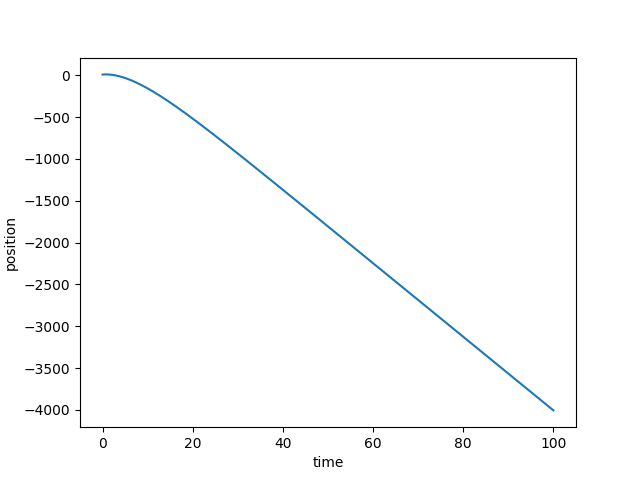

In [11]:
plt.plot(t,v[:,0])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 5: negative velocity

In [73]:
A = np.array([2,4,9])
opt = np.array([4,4,4])
kap = 10
K=np.array([1,1,1])
om = 10
wind_force=-6
m=np.array([1,1,1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [74]:
t, v = simulations.euler(initial_time=0, end_time=5, number_of_points=1000000, initial_value=np.array([2,1,0,4,4,4]), derivative=d)

<IPython.core.display.Javascript object>


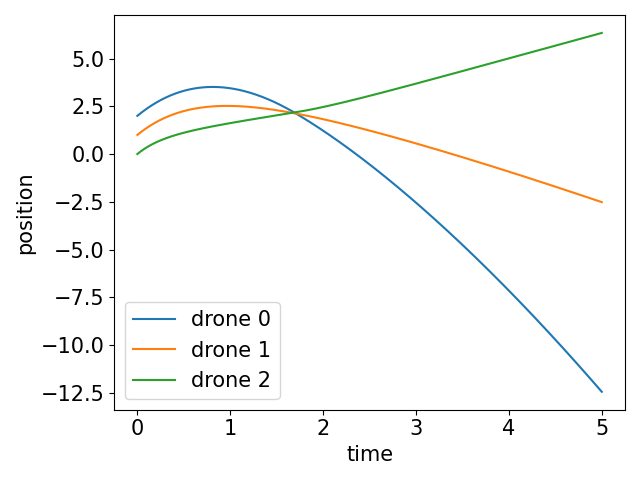

In [76]:
plt.plot(t,v[:,0],label='drone 0')
plt.plot(t,v[:,1],label='drone 1')
plt.plot(t,v[:,2],label='drone 2')
plt.xlabel("time",fontsize=15)
plt.ylabel("position",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

In [9]:
import visualisations

<IPython.core.display.Javascript object>


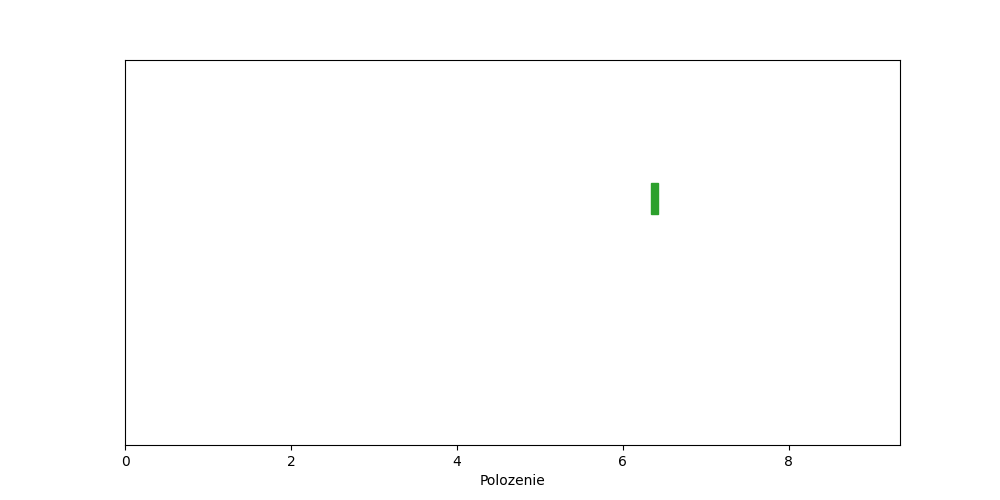

In [18]:
visualisations.visualise(t, v, filename='wind3',drone_height=[1,2,3],drone_radius=[0.4,0.4,0.4],heightmax=5)

### Situation 6: comparison of second version of our model and version with additional multiplying by exp(velocity difference)

In [17]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [18]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

<IPython.core.display.Javascript object>


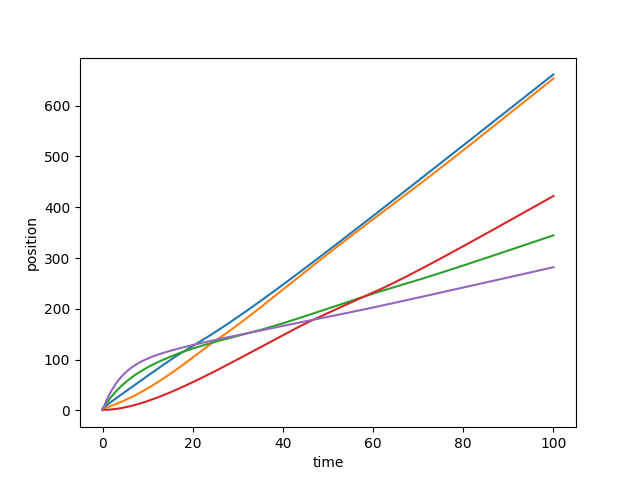

In [19]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

In [33]:
def model5(t, A, velocity, optimal_velocity, kappa, K, distance, omega, wind_function, m):
    """
    Function calculating value of second derivative according to variant of our model with velocity difference. n - number of objects.
    :param t: time.
    :param A: maximal accelerations, shape (n,)
    :param velocity: current velocity of objects, shape (n,)
    :param optimal_velocity: optimal velocity of objects, shape (n,)
    :param kappa: float
    :param K: shape (n,)
    :param distance: current location of objects/distance covered, shape(n,)
    :param omega: float
    :param alpha: float
    :param wind_function: function to calculate wind force. It can either be a float if the wind affects
    each of the drones identically or a np.array with shape (n,). Note that this function must take only one
    argument (time) so if your function takes more arguments you need to wrap it, for example using functools.partial.
    :param m: masses of consecutive drones, shape (n,)
    :return: np.array with shape (n,) representing accelerations of objects.
    """
    w = wind_function(t)
    dim = distance.shape[0]
    exp_vector = np.exp((-1)*distance/omega)
    exp_vector2 = np.exp((-1)*velocity/1)
    bool_array = np.empty((dim, dim))
    for i in range(dim):
        bool_array[:, i] = K[i]*simulations.is_in_front(i, distance)
    result = A*(1+(-1)*velocity/optimal_velocity-(1/kappa)*velocity*np.exp((1/omega)*distance)*np.matmul(bool_array, exp_vector)*np.matmul(bool_array, exp_vector2)*np.exp((1/1)*velocity))+w/m
    return result

In [34]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
alpha=1
wind_force=0
m = np.array([1,1,1,1,1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=model5, wind_function=wrapped, m=m)

In [35]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

/home/basia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/home/basia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in matmul
/home/basia/Desktop/Sem_ruch_uliczny/symulacje/simulations.py:33: RuntimeWarning: invalid value encountered in less
  return (distance < distance[i])*1


<IPython.core.display.Javascript object>


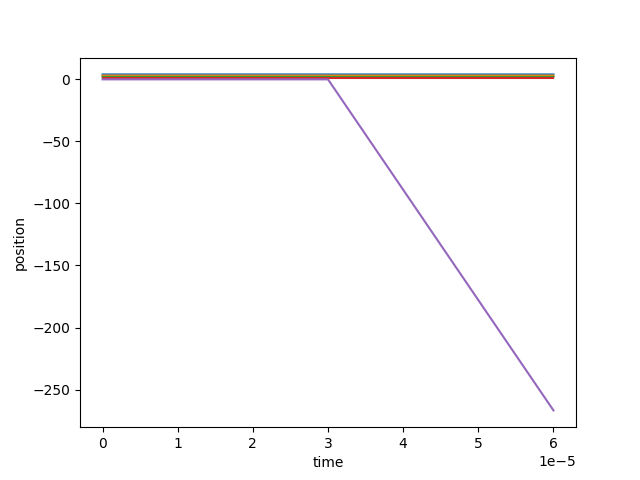

In [40]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

In [37]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([5,4,3,2,1])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
alpha=1
wind_force=0
m = np.array([1,1,1,1,1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=model5, wind_function=wrapped, m=m)

In [38]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

/home/basia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/home/basia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in matmul
/home/basia/Desktop/Sem_ruch_uliczny/symulacje/simulations.py:33: RuntimeWarning: invalid value encountered in less
  return (distance < distance[i])*1


<IPython.core.display.Javascript object>


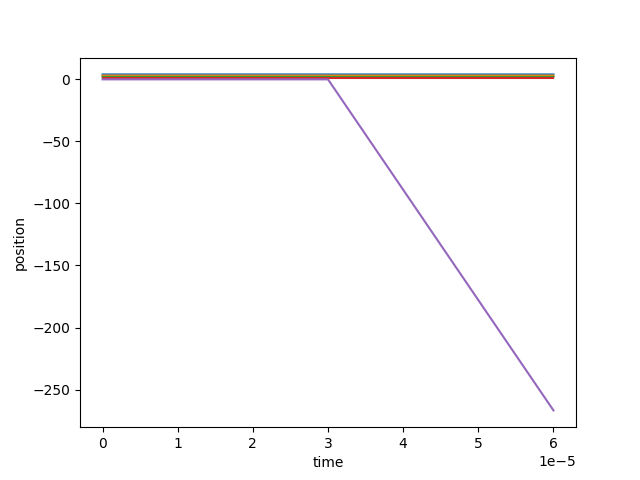

In [39]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

As we see, there is a probably a problem with numerical errors because of multiplication of two exponential functions.